### Kaggle Competition | Titanic Machine Learning from Disaster

>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.  This sensational tragedy shocked the international community and led to better safety regulations for ships. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.

>In this contest, we ask you to complete the analysis of what sorts of people were likely to survive.  In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

>This Kaggle Getting Started Competition provides an ideal starting place for people who may not have a lot of experience in data science and machine learning."

From the competition [homepage](http://www.kaggle.com/c/titanic-gettingStarted).

### Who survived?
Before we get started, whom do you think have higher survival rate? What factors contribute to survival? Those of you who already worked on this dataset, please skip this question. I would like the rest of you give it a try. Other examples: estimate the price of a house.

### Goal for this Notebook:
Show a simple example of an analysis of the Titanic disaster in Python using pandas ans scikit. This is aimed for those looking to get into the field or those who are already in the field and looking to see an example of an analysis done with Python.

#### This Notebook will show basic examples of: 
#### Data Handling
*   Importing Data with Pandas
*   Cleaning Data
*   Exploring Data through Visualizations with Matplotlib

#### Data Analysis
*    Supervised Machine learning Techniques:
    +   Logit Regression Model 
    +   Support Vector Machine (SVM) using 3 kernels
    +   Basic Random Forest

#### Valuation of the Analysis
*   K-folds cross validation to valuate results locally
*   Output the results from the IPython Notebook to Kaggle



#### Required Libraries:
* [NumPy](http://www.numpy.org/)
* [IPython](http://ipython.org/)
* [Pandas](http://pandas.pydata.org/)
* [SciKit-Learn](http://scikit-learn.org/stable/)
* [SciPy](http://www.scipy.org/)
* [StatsModels](http://statsmodels.sourceforge.net/)
* [Patsy](http://patsy.readthedocs.org/en/latest/)
* [Matplotlib](http://matplotlib.org/)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
from pandas import Series, DataFrame
from sklearn import datasets, svm
from patsy import dmatrices

### Data Handling
#### Let's read our data in using pandas:
* Pandas is a high-performance, easy-to-use data structures and data analysis tools for the Python programming language. The two primary data structures pandas provides are: Dataframe and Series. Dataframe is a Excel table / SQL table like object and Series is a time-series object.

In [2]:
df = pd.read_csv("data/train.csv") 

Let's see how our data looks like: 

In [3]:
df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.describe()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Let's take a look:

Above is a snippet of our data contained in a `Pandas` `DataFrame`. Think of a `DataFrame` as a Python's super charged version of the workflow in an Excel table. As you can see the summary holds quite a bit of information. First, it lets us know we have 891 observations, or passengers, to analyze here:
    
    Int64Index: 891 entries, 0 to 890

#### Features
Next it shows us all of the columns in `DataFrame`. Each column tells us something about each of our observations, like their `name`, `sex` or `age`. These colunms  are called a features of our dataset. 

#### Summary
A summary of the dataframe show basic summary of features of the dataframe. After each feature it lets us know how many values it contains. While most of our features have complete data on every observation, like the `survived` feature here: 

    survived    891  non-null values 

some are missing information, like the `age` feature: 

    age         714  non-null values 

These missing values are represented as `NaN`s.

### Take care of missing values:
The feature `cabin` have many missing values and so can’t add much value to our analysis. To handle this we will drop it from the dataframe to preserve the integrity of our dataset.
The feature `ticket` has same ticket info for individuals with different surnames.

To do that we'll use this line of code to drop the features entirely:

    df = df.drop(['ticket','cabin'], axis=1) 


While this line of code removes the `NaN` values from every remaining column / feature:
   
    df = df.dropna()
     
Now we have a clean and tidy dataset that is ready for analysis. Because `.dropna()` removes an observation from our data even if it only has 1 `NaN` in one of the features, it would have removed most of our dataset if we had not dropped the `ticket` and `cabin`  features first.



In [5]:
print df.columns.values
df = df.drop(['Ticket','Cabin'], axis=1)
print df.columns.values
print df.isnull().sum()
df = df.dropna()
print df.isnull().sum()

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Fare' 'Embarked']
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


For a detailed look at how to use pandas for data analysis, the best resource is Wes Mckinney's [book](http://shop.oreilly.com/product/0636920023784.do). Additional interactive tutorials that cover all of the basics can be found [here](https://bitbucket.org/hrojas/learn-pandas) (they're free).  If you still need to be convinced about the power of pandas check out this wirlwhind [look](http://wesmckinney.com/blog/?p=647) at all that pandas can do. 

### Let's take a Look at our data graphically:

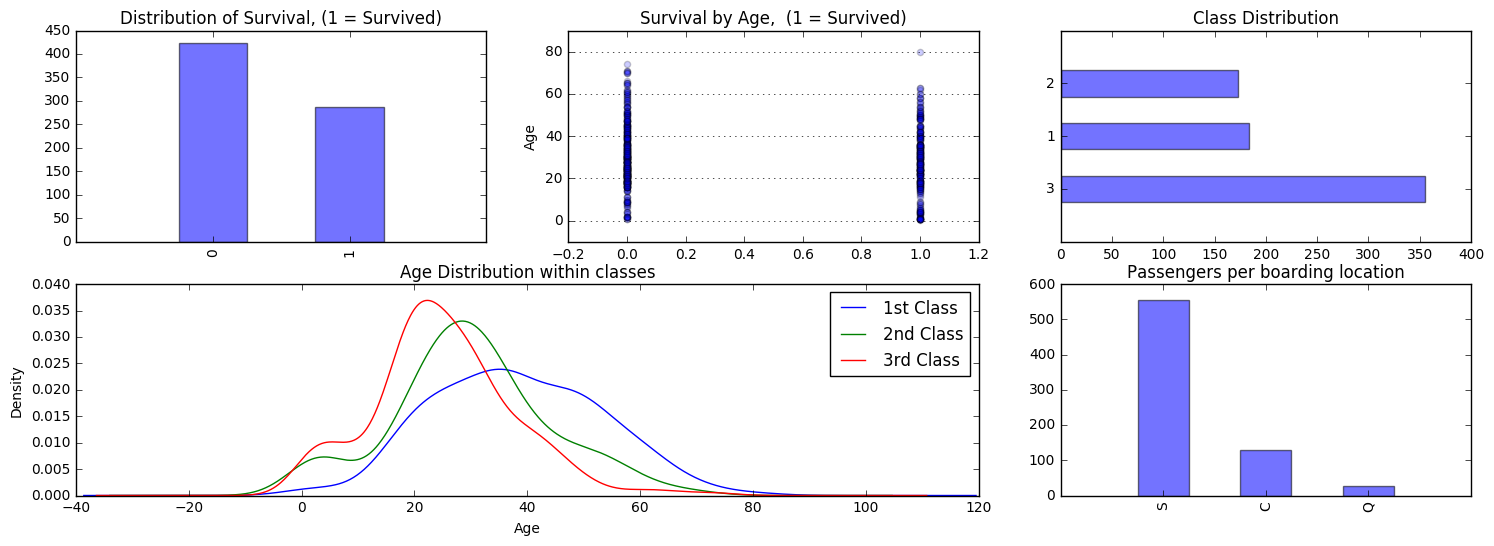

In [7]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(df.Embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

### Exploratory Visualization:

The point of this competition is to predict if an individual will survive based on the features in the data like:
 
 * Traveling Class (called pclass in the data)
 * Sex 
 * Age
 * Fare Price

Let’s see if we can gain a better understanding of who survived and died. 


First let’s plot a bar graph of those who Survived Vs. Those who did not.


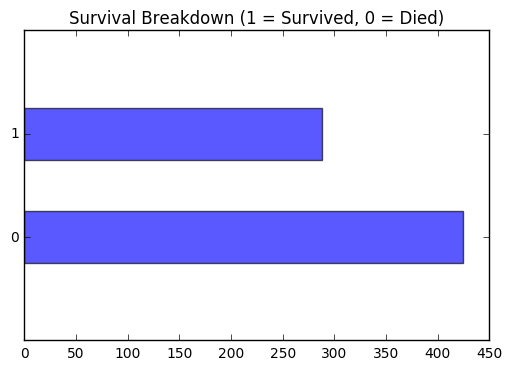

In [8]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(df.Survived.value_counts())) 
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")

### Now let’s tease more structure out of the data,
### Let’s break the previous graph down by gender


0    360
1     93
Name: Survived, dtype: int64
0     64
1    195
Name: Survived, dtype: int64


(-1, 2)

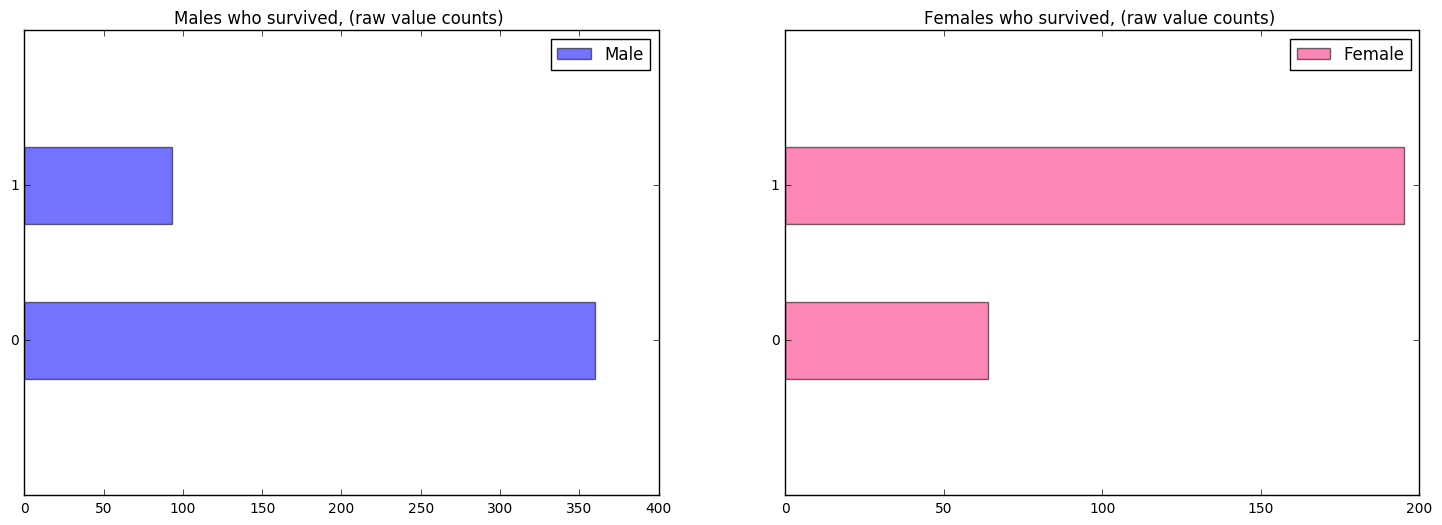

In [9]:
fig = plt.figure(figsize=(18,6))

#create a plot of two subsets, male and female, of the survived variable.
#After we do that we call value_counts() so it can be easily plotted as a bar graph. 
#'barh' is just a horizontal bar graph
df_male = df.Survived[df.Sex == 'male'].value_counts().sort_index()
df_female = df.Survived[df.Sex == 'female'].value_counts().sort_index()
print df_male
print df_female

ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='Male', alpha=0.55)
plt.title("Males who survived, (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

ax1 = fig.add_subplot(122)
df_female.plot(kind='barh', color='#FA2379', label='Female', alpha=0.55)
plt.title("Females who survived, (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

Here it’s clear that females had a greater survival rate proportionally (~25%), than men (~20%)!

#### Great! But let’s go down even further:
Can we capture more of the structure by using Pclass? Here we will bucket classes as lowest class or any of the high classes (classes 1 - 2). 3 is lowest class. Let’s break it down by Gender and what Class they were traveling in.


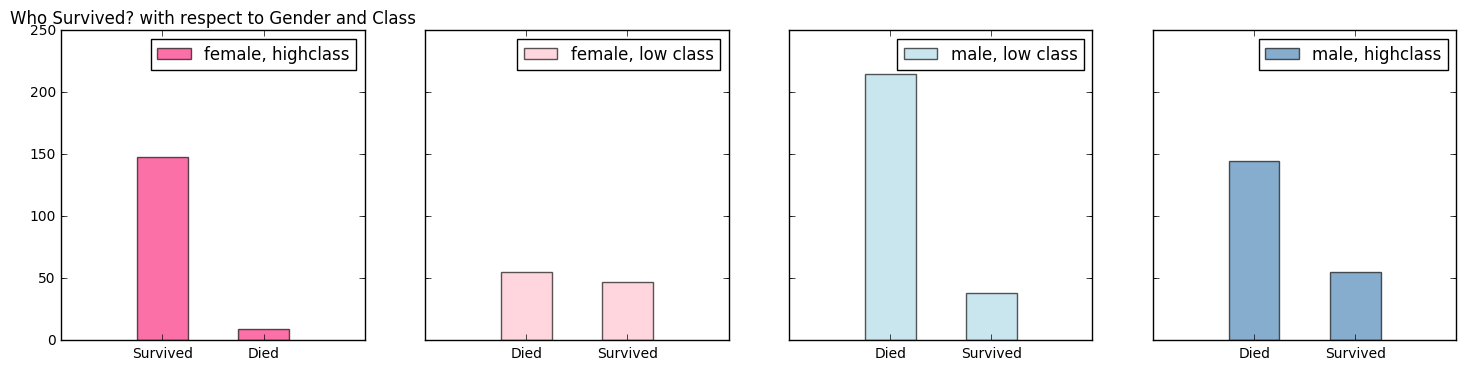

In [10]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

# building on the previous code, here we create an additional subset with in the gender subset 
# we created for the survived variable. I know, thats a lot of subsets. After we do that we call 
# value_counts() so it it can be easily plotted as a bar graph. this is repeated for each gender 
# class pair.
ax1=fig.add_subplot(141)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

Awesome! Now we have a lot more information on who survived and died in the tragedy. With this deeper understanding, we are better equipped to create better more insightful models. This is a typical process in interactive data analysis. First you start small and understand the most basic relationships and slowly increment the complexity of your analysis as you discover more and more about the data you’re working with.

I've done my best to make the plotting code readable and intuitive, but if you’re looking for a more detailed look on how to start plotting in matplotlib, check out this beautiful notebook [here](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb). 

Now that we have a basic understanding of what we are trying to predict, let’s predict it.
## Supervised Machine Learning
#### Logistic Regression:

As explained by Wikipedia:
>In statistics, logistic regression or logit regression is a type of regression analysis used for predicting the outcome of a categorical dependent variable (a dependent variable that can take on a limited number of values, whose magnitudes are not meaningful but whose ordering of magnitudes may or may not be meaningful) based on one or more predictor variables. That is, it is used in estimating empirical values of the parameters in a qualitative response model. The probabilities describing the possible outcomes of a single trial are modeled, as a function of the explanatory (predictor) variables, using a logistic function. Frequently (and subsequently in this article) "logistic regression" is used to refer specifically to the problem in which the dependent variable is binary—that is, the number of available categories is two—and problems with more than two categories are referred to as multinomial logistic regression or, if the multiple categories are ordered, as ordered logistic regression.
Logistic regression measures the relationship between a categorical dependent variable and one or more independent variables, which are usually (but not necessarily) continuous, by using probability scores as the predicted values of the dependent variable.[1] As such it treats the same set of problems as does probit regression using similar techniques.

The three cells below show the process of creating our Logitist regression model, training it on the data, and examining its performance. 

First, we define our formula for our Logit regression. In the next cell we create a regression friendly dataframe that sets up boolean values for the categorical variables in our formula and lets our regression model know the types of inputs we're giving it. The model is then instantiated and fitted before a summary of the model's performance is printed. In the last cell we graphically compare the predictions of our model to the actual values we are trying to predict, as well as the residual errors from our model to check for any structure we may have missed.

In [7]:
# model formula
# here the ~ sign is an = sign, and the features of our dataset
# are written as a formula to predict survived. The C() lets our 
# regression know that those variables are categorical.
# Ref: http://patsy.readthedocs.org/en/latest/formulas.html
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp  + C(Embarked)' 
# create a results dictionary to hold our regression results for easy analysis later        
results = {} 

In [8]:
# split data into train and test
df_train = df.sample(frac=0.8)
df_test = df.drop(df_train.index)

# create a regression friendly dataframe using patsy's dmatrices function
y_train, X_train = dmatrices(formula, data=df_train, return_type='dataframe')
y_train = y_train.values.ravel()

y_test, X_test = dmatrices(formula, data=df_test, return_type='dataframe')
y_test = y_test.values.ravel()
print X_test
print y_test

     Intercept  C(Pclass)[T.2]  C(Pclass)[T.3]  C(Sex)[T.male]  \
0          1.0             0.0             1.0             1.0   
3          1.0             0.0             0.0             0.0   
9          1.0             1.0             0.0             0.0   
11         1.0             0.0             0.0             0.0   
23         1.0             0.0             0.0             1.0   
30         1.0             0.0             0.0             1.0   
33         1.0             1.0             0.0             1.0   
40         1.0             0.0             1.0             0.0   
52         1.0             0.0             0.0             0.0   
54         1.0             0.0             0.0             1.0   
56         1.0             1.0             0.0             0.0   
60         1.0             0.0             1.0             1.0   
62         1.0             0.0             0.0             1.0   
70         1.0             1.0             0.0             1.0   
80        

In [9]:
model = sklearn.linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Let's predict

In [10]:
y_predict = model.predict(X_test)
print zip(y_predict, y_test)
print model.score(X_test, y_test)

[(0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.

### Support Vector Machine (SVM)

*"So uhhh, what if a straight line just doesn’t cut it."*

**Wikipeda:**
>In machine learning, support vector machines (SVMs, also support vector networks[1]) are supervised learning models with associated learning algorithms that analyze data and recognize patterns, used for classification and regression analysis. The basic SVM takes a set of input data and predicts, for each given input, which of two possible classes forms the output, making it a non-probabilistic binary linear classifier. Given a set of training examples, each marked as belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples into one category or the other. An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall on.
In addition to performing linear classification, SVMs can efficiently perform non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

In [13]:
svm_model = sklearn.svm.SVC()
svm_model.fit(X_train, y_train)
y_predict = svm_model.predict(X_test)
print svm_model.score(X_test, y_test)

0.838028169014


### Random Forest

"Well, What if this line / decision boundary thing doesn’t work at all."

**Wikipedia, crystal clear as always:**
>Random forests are an ensemble learning method for classification (and regression) that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes output by individual trees.

**Once again, the skinny and why it matters to you:**

There are always skeptics, and you just might be one about all the fancy lines we've created so far. Well for you, here’s another option; the Random Forest. This technique is a form of non-parametric modeling that does away with all those equations we created above, and uses raw computing power and a clever statistical observation to tease the structure out of the data. 

An anecdote to explain how this the forest works starts with the lowly gumball jar. We've all guess how many gumballs are in that jar at one time or another, and odds are not a single one of us guessed exactly right. Interestingly though, while each of our individual guesses for probably were wrong, the average of all of the guesses, if there were enough, usually comes out to be pretty close to the actual number of gumballs in the jar. Crazy, I know.  This idea is that clever statistical observation that lets random forests work.

**How do they work?** A random forest algorithm randomly generates many extremely simple models to explain the variance observed in random subsections of our data.  These models are like our gumball guesses. They are all awful individually. Really awful. But once they are averaged, they can be powerful predictive tools. The averaging step is the secret sauce. While the vast majority of those models were extremely poor; they were all as bad as each other on average. So when their predictions are averaged together, the bad ones average their effect on our model out to zero. The thing that remains, *if anything*, is one or a handful of those models have stumbled upon the true structure of the data.
The cell below shows the process of instantiating and fitting a random forest, generating predictions form the resulting model, and then scoring the results.

In [17]:
import sklearn.ensemble as ske

rf_model = ske.RandomForestClassifier()
rf_model.fit(X_train, y_train)

print rf_model.score(X_test, y_test)

0.830985915493
